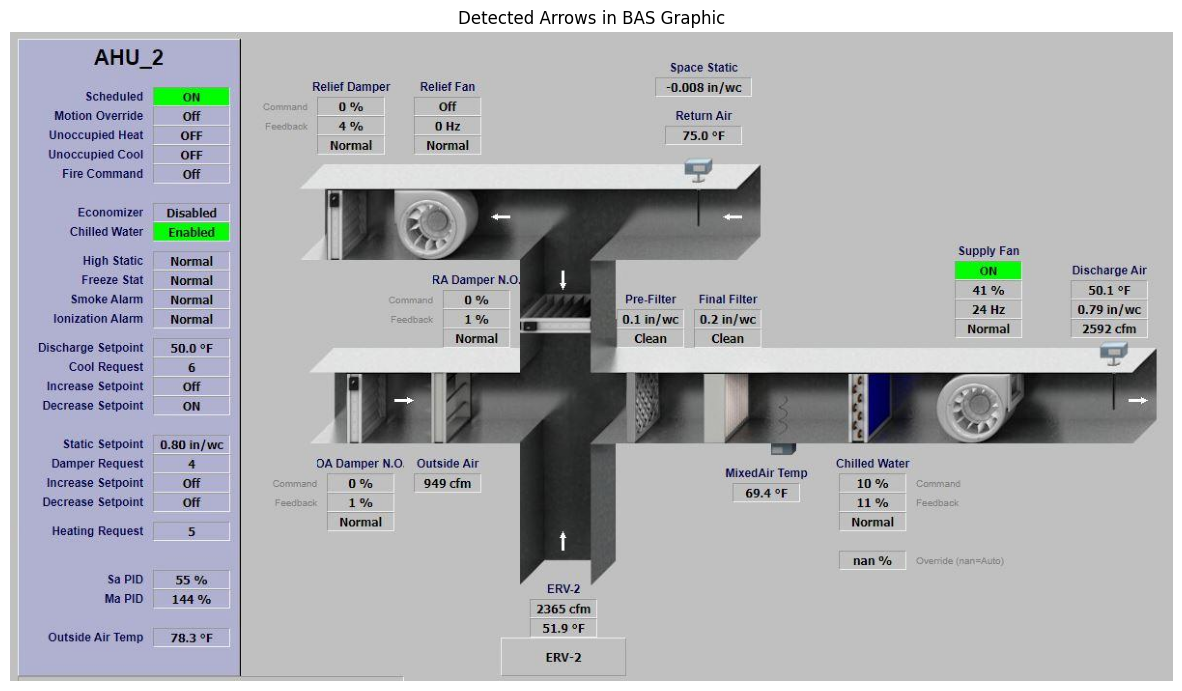

In [4]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

'''
NOT working maybe try ML on arrows?
But not all AHU graphics have arrows...
'''


# Load the BAS graphic image
image_path = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu.jpg'
arrow_templates_path = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\arrow_template.png' 

# Function to rotate an image
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Load the BAS graphic image
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load all arrow templates
templates = []
for template_path in glob.glob(arrow_templates_path):
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    if template is not None:
        # Add the original and rotated versions of the template
        angles = [0, 90, 180, 270]  # Angles for left, up, right, down
        for angle in angles:
            templates.append(rotate_image(template, angle))

# List to store matching results
matching_results = []

# Apply template matching for each arrow template
for template in templates:
    # Get the dimensions of the template
    w, h = template.shape[::-1]

    # Apply template matching
    res = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)

    # Store the results
    for pt in zip(*loc[::-1]):
        matching_results.append((pt, (w, h)))

# Draw bounding boxes around detected arrows
for pt, (w, h) in matching_results:
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

# Convert BGR image to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with detected arrows
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.title("Detected Arrows in BAS Graphic")
plt.axis('off')
plt.show()
